<a href="https://colab.research.google.com/github/Melckykaisha/BMI-CALCULATOR/blob/main/interaction_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx requests matplotlib pyvis

In [2]:
import requests

# Define the protein name (GAPDH) and species (Homo sapiens - 9606)
protein = "GAPDH"
species = 9606  # Human

# STRING API URL
url = f"https://string-db.org/api/json/network?identifiers={protein}&species={species}"

# Fetch data
response = requests.get(url)
data = response.json()

# Check first interaction
print(data[0])


{'stringId_A': '9606.ENSP00000229270', 'stringId_B': '9606.ENSP00000355890', 'preferredName_A': 'TPI1', 'preferredName_B': 'EPRS1', 'ncbiTaxonId': '9606', 'score': 0.462, 'nscore': 0.115, 'fscore': 0, 'pscore': 0, 'ascore': 0.089, 'escore': 0, 'dscore': 0, 'tscore': 0.386}


In [3]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add interactions from STRING data
for interaction in data:
    protein1 = interaction["preferredName_A"]
    protein2 = interaction["preferredName_B"]
    score = interaction["score"]  # Confidence score of interaction

    G.add_edge(protein1, protein2, weight=score)

# Print network summary
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 11
Number of edges: 35


In [4]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Get top 5 most connected proteins
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Proteins by Degree Centrality:")
for protein, centrality in top_degree:
    print(f"{protein}: {centrality:.4f}")

Top 5 Proteins by Degree Centrality:
GAPDH: 1.0000
TPI1: 0.8000
ENO1: 0.8000
GPI: 0.8000
RPL13A: 0.7000


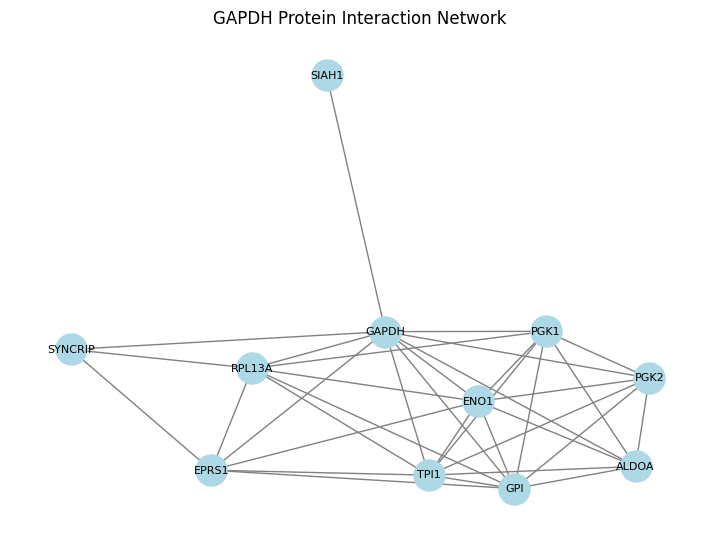

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Position nodes using spring layout
pos = nx.spring_layout(G)

# Draw network
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray", font_size=8)

plt.title(f"GAPDH Protein Interaction Network")
plt.show()

In [ ]:
!pip install pyvis networkx requests

import requests
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML

# Define the protein name (GAPDH) and species (Homo sapiens - 9606)
protein = "GAPDH"
species = 9606  # Human

# STRING API URL
url = f"https://string-db.org/api/json/network?identifiers={protein}&species={species}"

# Fetch data
response = requests.get(url)
data = response.json()

# Create an empty NetworkX graph
G = nx.Graph()

# Add edges from STRING data
for interaction in data:
    protein1 = interaction["preferredName_A"]
    protein2 = interaction["preferredName_B"]
    score = interaction["score"]  # Confidence score of interaction

    G.add_edge(protein1, protein2, weight=score)

# Create a Pyvis Network
net = Network(notebook=True, height="600px", width="100%", bgcolor="#222222", font_color="white", cdn_resources="in_line")

# Add nodes and edges
for node in G.nodes:
    net.add_node(node)

for edge in G.edges:
    net.add_edge(*edge)




In [17]:
# Save and display the network
net.show("gapdh_network.html")

# Correct way to display in Google Colab
display(HTML("gapdh_network.html"))

gapdh_network.html
